In [5]:
#MODULE 2
import pandas as pd
from pandas.plotting import lag_plot
import seaborn as sns
from pandas.plotting import autocorrelation_plot

In [3]:
airlinedf = pd.read_csv("Time-Series Analysis and Forecasting - AirPassengers.csv")

In [6]:
airlinedf.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

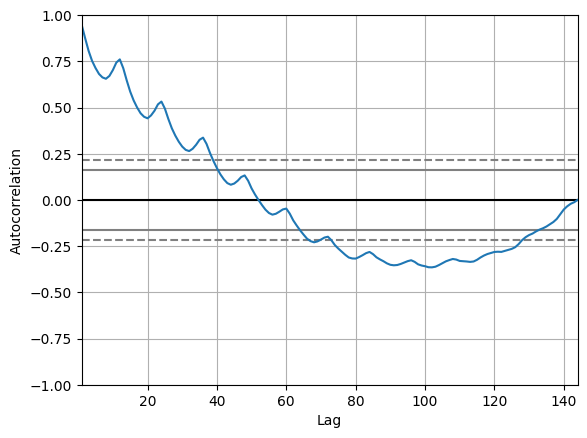

In [9]:
autocorrelation_plot(airlinedf['#Passengers'])

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

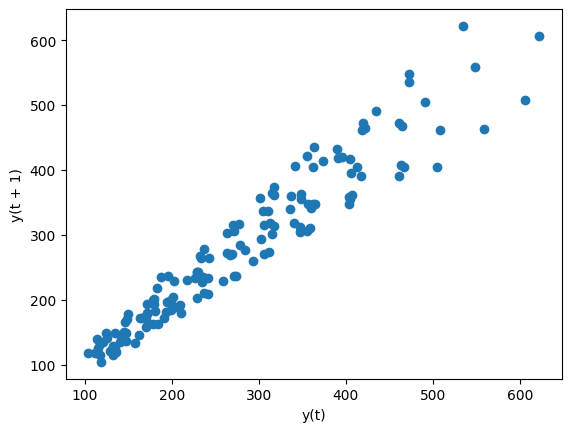

In [11]:
lag_plot(airlinedf['#Passengers'])

In [13]:
df_wind = pd.read_csv('DailyDelhiClimateTrain.csv', header=0, parse_dates=[0])

In [15]:
df_wind.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [17]:
df_wind.tail()

,date,meantemp,humidity,wind_speed,meanpressure
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000
1461,2017-01-01,10.000000,100.000000,0.000000,1016.000000


In [20]:
df_wind.shape

(1462, 5)

In [22]:
df_wind.shape[0]

1462

In [25]:
#putting 80% of dataset into train variable
train_size = int(df_wind.shape[0]*0.8)
train_size

1169

In [26]:
new_train = df_wind[0:train_size]

In [27]:
new_train

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1164,2016-03-10,25.562500,57.437500,7.981250,1013.187500
1165,2016-03-11,25.066667,67.800000,6.546667,1012.533333
1166,2016-03-12,24.562500,66.937500,9.487500,1009.562500
1167,2016-03-13,24.250000,65.187500,6.843750,1011.187500


In [28]:
new_test = df_wind[train_size:]
new_test

,date,meantemp,humidity,wind_speed,meanpressure
1169,2016-03-15,24.066667,58.933333,8.646667,1014.866667
1170,2016-03-16,23.937500,53.750000,10.881250,1012.812500
1171,2016-03-17,26.312500,50.312500,6.843750,1010.437500
1172,2016-03-18,26.187500,61.250000,6.712500,1009.812500
1173,2016-03-19,26.785714,61.857143,3.578571,1009.214286
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [29]:
new_train.shape

(1169, 5)

In [32]:
ddf_wind2 = pd.read_csv('DailyDelhiClimateTrain.csv', header=0, parse_dates=[0])

In [33]:
ddf_wind2['t'] = ddf_wind2['wind_speed'].shift(1)

In [34]:
ddf_wind2.head()

,date,meantemp,humidity,wind_speed,meanpressure,t
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,0.000000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2.980000
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,4.633333
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,1.233333


In [37]:
new_train, new_test = ddf_wind2[1:ddf_wind2.shape[0]-7],ddf_wind2[ddf_wind2.shape[0]-7:]

In [38]:
new_train.head()

,date,meantemp,humidity,wind_speed,meanpressure,t
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,0.000000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2.980000
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,4.633333
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,1.233333
5,2013-01-06,7.000000,82.800000,1.480000,1018.000000,3.700000


In [39]:
train_x, train_y = new_train['t'], new_train['wind_speed']

In [40]:
test_x, test_y = new_test['t'], new_test['wind_speed']

In [41]:
new_prediction = test_x.copy()

In [42]:
new_prediction.head(
)

1455    9.085000
1456    8.784211
1457    8.335000
1458    3.547826
1459    6.000000
Name: t, dtype: float64

In [43]:
test_y

1455    8.784211
1456    8.335000
1457    3.547826
1458    6.000000
1459    6.266667
1460    7.325000
1461    0.000000
Name: wind_speed, dtype: float64

In [44]:
#We will have to use the mean squared error. The mean square error is just the sum of the square of difference between predicted values and Y values, and we're going to use this mean square error,
from sklearn.metrics import mean_squared_error
new_mse = mean_squared_error(test_y, new_prediction)
new_mse

12.009894419074666

In [46]:
from matplotlib import pyplot as plt

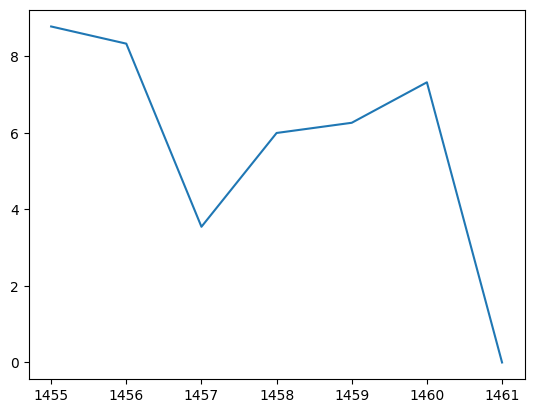

In [47]:
plt.plot(test_y)

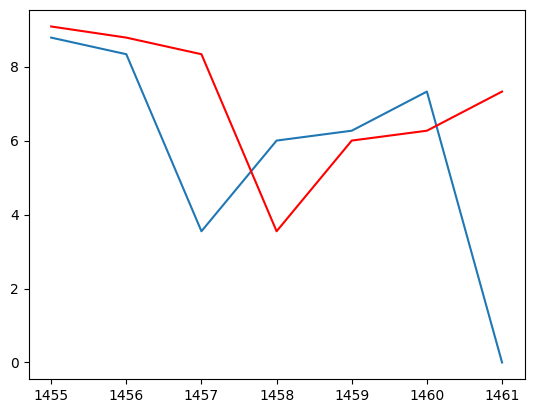

In [48]:
plt.plot(test_y)
plt.plot(new_prediction,color='red')